In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from imdb import Cinemagoer

In [2]:
detail_df = pd.read_csv('./data/datasets/movie/all_details.csv', sep=',', encoding='utf-8')
detail_df.head()

C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,movie id,title,series,release year,certification,duration,average rating,rating total,popularity score,popularity delta,...,numOfUserReviews,numOfCriticReviews,metaScore,star_url_list,countries_of_origin,official_sites,languages,filming_locations,production_companies,budget_list
0,tt0378947,Melinda and Melinda,NaN,2004,PG-13,1h 39m,6.4,32K,NaN,NaN,...,184,155,54.0,/name/nm0002071/?ref_=tt_ov_st|/name/nm0005416...,United States,Official site,English,"Filming locations|Central Park, Manhattan, New...",Production companies|Fox Searchlight Pictures|...,NaN
1,tt0306047,Scary Movie 3,NaN,2003,PG-13,1h 24m,5.5,147K,"1,525",151,...,384,159,49.0,/name/nm0267506/?ref_=tt_ov_st|/name/nm0000221...,United States|Canada,Official sites|Miramax (United States)|Officia...,English,"Filming locations|Washington, District of Colu...",Production companies|Dimension Films|Brad Grey...,"$48,000,000 (estimated)"
2,tt4183480,Forevermore,NaN,NaN,2014–2015,TV-PGTV-PG,8.4,280,NaN,NaN,...,NaN,NaN,NaN,/name/nm6628668/?ref_=tt_ov_st|/name/nm4715046...,Philippines,NaN,Filipino,NaN,ABS-CBN,NaN
3,tt10483610,Capitani,TV Series,2019–2022,TV-MA,5h 12m,6.6,4.5K,543,"2,342",...,85,12,NaN,/name/nm5020632/?ref_=tt_ov_st|/name/nm8090479...,Luxembourg,Coproducer's website,Luxembourgish,Filming locations|Luxembourg|,Production companies|Artémis Productions|Film ...,NaN
4,tt9253298,Shaun the Sheep 3D,TV Mini Series,2012,Not Rated,1m,8.1,28,NaN,NaN,...,NaN,NaN,NaN,/name/nm1017994/?ref_=tt_ov_st,United Kingdom,Official site,NaN,NaN,Production company|Aardman Animations|,NaN


In [3]:
detail_df = detail_df.dropna(subset=['average rating'])

In [4]:
detail_df = detail_df.dropna(subset=['rating total'])

In [5]:
detail_df = detail_df.dropna(subset=['release year'])

In [6]:
detail_df = detail_df.dropna(subset=['duration'])

In [7]:
runtimes = []
genres = []
MPPAs = []
years = []
kinds = []

In [ ]:

# ia = Cinemagoer()
# for i, id in tqdm(enumerate(detail_df['movie id'])):
#     id = id.replace('tt', '')
#     movie = ia.get_movie(id)
#     try:
#        runtimes.append(movie['runtimes'][0])
#     except: 
#         runtimes.append(0)
#     MPPAs.append(detail_df.iloc[i]['certification'])
#     genres.append(movie['genres'])
#     years.append(movie['year'])
#     kinds.append(movie['kind'])

In [8]:
def convert_duration_2_num(x):
  nums = ''
  for c in x:
    if c != 'h' and c != 'm':
      nums +=c
  nums = nums.split(" ")
  if len(nums) == 1:
    return int(nums[0])
  else:
    return int(nums[0]) * 60 + int(nums[1])  
detail_df['movie runtime'] = detail_df['duration'].apply(convert_duration_2_num)

In [9]:
import seaborn as sns

In [10]:
signs = set()
for x in detail_df['rating total']:
  for c in x:
    if c.isnumeric():
      continue
    signs.add(c)
signs

{'.', 'K', 'M'}

In [13]:
def convert_rating_total_2_num(x):
  if 'K' in x:
    return int(float(x[:-1]) * 1000)
  if 'M' in x:
    return int(float(x[:-1]) * 100000)
  return x

In [14]:
rating = []
rating_total_list = list(detail_df['rating total'])
average_rating_list = list(detail_df['average rating'])
for i in range(len(detail_df['rating total'])):
  rating.append(float(rating_total_list[i]) * float(average_rating_list[i]))
rating_log = [np.log(r) for r in rating]

ValueError: could not convert string to float: '32K'

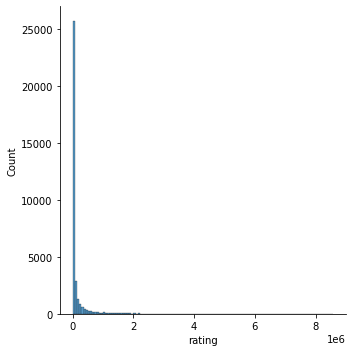

In [45]:
sns.displot(pd.Series(rating, name='rating'), bins=120)

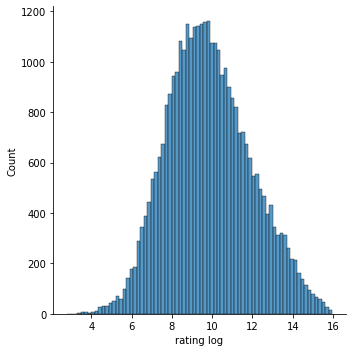

In [47]:
sns.displot(pd.Series(rating_log, name='rating log'))